In [2]:
import pandas as pd, numpy as np, json, os
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
m=json.loads(open('ignore/member_timelines.json','r').read())

In [10]:
set([i['Csoportok'] for i in m if i['Típus']=='Párt'])

{'⚛️ PP-DD - Partidul Poporului Dan Diaconescu',
 '⚪️ FDSN - mocrat al Salvarii Nationale',
 '⚪️ FSN - Salvării Naţionale',
 '✳️ PNTCD - ional Ţărănesc Creştin Democrat',
 '🌷 RMDSZ - Romániai Magyar Demokrata Szövetség',
 '🌹 PDSR - emocraţiei Sociale din România',
 '🌹 PSD - Social Democrat',
 '🌹 PSDR - ocial Democrat Român',
 '🌹 PSM - Socialist al Muncii',
 '🍀 FER - a Ecologistă Română',
 '🍀 MER - Ecologistă din România',
 '🍀 PDAR - emocrat Agrar din România',
 '🍀 PER - Ecologist Român',
 '🍏 PMP - Mişcarea Populară',
 '👤 Independent - Independent',
 '👤 Minorități - Minorități',
 '📐 PAC - Alianţei Civice',
 "📐 PL'93 - eral",
 '📐 PNL - Naţional Liberal',
 '📐 PNL-AT - nal Liberal',
 '📐 PNL-CD - nal Liberal',
 '🔘 AUR - pentru Unitatea Românilor',
 '🔘 FC - Civică',
 '🔘 GDC - Democratică de Centru',
 '🔘 PAR - Alternativa României',
 '🔘 PDM - Democrat al Muncii',
 '🔘 PLS - Liber Schimbist',
 '🔘 PRNR - econstrucţiei Naţionale din România',
 '🔘 PTLDR - eretului Liber Democrat din România',
 '🔘 

In [299]:
# m=m[:1000]

In [300]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        if i['Csoportok'] not in data[i['Típus']]:data[i['Típus']][i['Csoportok']]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][i['Csoportok']]:data[i['Típus']][i['Csoportok']][st]=set()
            data[i['Típus']][i['Csoportok']][st].add(name)            
            if name not in attention:attention[name]={}
            if st not in attention[name]:attention[name][st]=0
            attention[name][st]+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


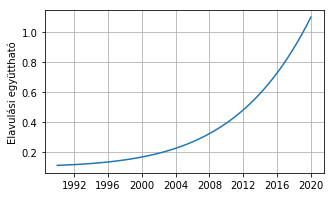

In [301]:
def anneal(t,p=7):
    #pd.to_datetime('2020-01-01')-pd.to_datetime('1989-01-01')=11322
    return (2-(pd.to_datetime('2020-01-01')-pd.to_datetime(t)).days/11322)**p
    
tanneal={}
anneal2020=anneal(pd.to_datetime('2020'))
for t in pd.date_range('1990','2020'):
    tanneal[t]=anneal(t)/anneal2020+0.1
    tanneal[str(t)[:10]]=tanneal[t]
plt.subplots(1,1,figsize=(5,3))
plt.grid()
plt.plot(tanneal.keys(),tanneal.values())
plt.ylabel('Elavulási együttható')
plt.show()

In [302]:
edges={}
points={'Ország':3,'Bizottság':4,'Párt':2,'Megye':1}
for tipus in data:
    for csoport in data[tipus]:
        print(csoport)
        for t in data[tipus][csoport]:
            names=list(data[tipus][csoport][t])
            for r in range(len(names)):
                name=names[r]
                for p in range(r+1,len(names)):
                    name2=names[p]
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]
                    if nset not in edges:edges[nset]={'anneal':0,'values':0}
                    edges[nset]['values']+=v
                    edges[nset]['anneal']+=v*tanneal[t]

🇮🇳 India
🇸🇪 Svédország
🇦🇷 Argentína
🇦🇹 Ausztria
🇦🇺 Ausztrália
🇨🇮 Elefántcsontpart
🇫🇮 Finnország
🇭🇷 Horvátország
🇱🇹 Litvánia
🇵🇹 Portugália
🇸🇮 Szlovénia
🇹🇭 Thaiföld
🇧🇪 Belgium
🇧🇬 Bulgária
🇪🇨 Ecuador
🇮🇷 Irán
🇹🇲 Türkmenisztán
Más ország
🇨🇿 Czechia
🇫🇷 Franciaország
🇬🇧 Egyesült Királyság
🇮🇩 Indonézia
🇮🇪 Írország
🇱🇺 Luxemburg
🇲🇦 Marokkó
🇵🇭 Fülöp-szigetek
🇧🇦 Bosznia-Hercegovina
🇳🇴 Norvégia
🇷🇸 Szerbia
🇩🇪 Németország
🇹🇳 Tunézia
🇹🇷 Törökország
🇨🇳 Kína
🇬🇷 Görögország
🇮🇹 Olaszország
🇯🇵 Japán
🇰🇷 Dél-Korea
🇲🇽 Mexikó
🇵🇪 Peru
🇪🇸 Spanyolország
🇨🇾 Ciprus
🇺🇾 Uruguay
🇻🇪 Venezuela
🇨🇷 Costa Rica
🇸🇬 Szingapúr
🇱🇧 Libanon
🇨🇬 Kongó
🇲🇪 Montenegró
🇸🇳 Szenegál
🇪🇬 Egyiptom
🇨🇦 Kanada
🇨🇱 Chile
🇮🇱 Izrael
🇩🇿 Algéria
🇬🇪 Grúzia
🇦🇪 Egyesült Arab Emírségek
🇧🇷 Brazília
🇨🇺 Kuba
🇪🇪 Észtország
🇺🇦 Ukrajna
🇸🇰 Szlovákia
🇿🇦 Dél-Afrika
🇵🇰 Pakisztán
🇵🇱 Lengyelország
🇦🇱 Albánia
🇯🇴 Jordánia
🇧🇭 Bahrein
🇦🇲 Örményország
🇸🇾 Szíria
🇲🇾 Malajzia
🇲🇳 Mongólia
🇨🇴 Kolumbia
🇶🇦 Katar
🇻🇳 Vietnam
🇨🇭 Svájc
🇱🇻 Lettország
🇲🇰 Macedónia
Jugoszlávia
🇲🇹 Mál

Save

In [303]:
import pickle

In [304]:
def save_obj(obj, name ):
    with open('ignore/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('ignore/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [305]:
save_obj(edges,'plotter_name_edges')

In [82]:
edges=load_obj('plotter_name_edges')

Prune

In [306]:
df=pd.DataFrame(edges).T

In [307]:
all_nodes=set(df.reset_index()['level_0']).union(df.reset_index()['level_1'])

In [308]:
min_baratsag=500
df2=df[df['anneal']>min_baratsag]

In [309]:
df2['regi']=df2['anneal']/df2['values']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [310]:
df2=df2['anneal'].reset_index()

In [311]:
df2.columns=['source','target','weight']

In [312]:
nodes={}
for i in all_nodes:
    if i not in nodes:
        nodes[i]={'pr':0,'bc':0,'cf':0}

In [313]:
G=nx.Graph(df2)

In [314]:
r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['pr']=r[i]/mr

In [315]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
r = nx.current_flow_closeness_centrality(Gc,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['cf']=r[i]/mr

In [316]:
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z
    links[name2][name]=z

In [317]:
#save 
network={'nodes':nodes,'links':links}
print(len(nodes),'nodes and',len(G.edges()),'edges')

2811 nodes and 307728 edges


In [318]:
open('ignore/plotter_name.json','w').write(json.dumps(network))

32754181

In [320]:
import zipfile

with zipfile.ZipFile("json/plotter_name.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name.json",'plotter_name.json')